In [111]:
library(randomForest)
library(partykit)
library(rpart)
library(mobForest)
library(e1071)

# Méthodes de machine learning

In [2]:
data_tot = read.csv('./Donnees/Plusieurs_pays/Total.csv', header = TRUE)
data_tot = data_tot[-c(47,60)]

Création d'un nouveau dataframe sans les variables `Rating` et `Pays`, utilisé après :

In [3]:
#data = data_tot[,-c(81,82,83,84)]
data = data_tot[,-c(34:46,81,82,83,84)]

## Random Forest

#### Sur la variable Rating

Ici on cherche à faire de la prédiction sur la variable `Rating`.

In [4]:
foot.rf = randomForest(data_tot$Rating ~ ., data=data)

In [5]:
print(foot.rf)


Call:
 randomForest(formula = data_tot$Rating ~ ., data = data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 22

          Mean of squared residuals: 0.004480867
                    % Var explained: 70.13


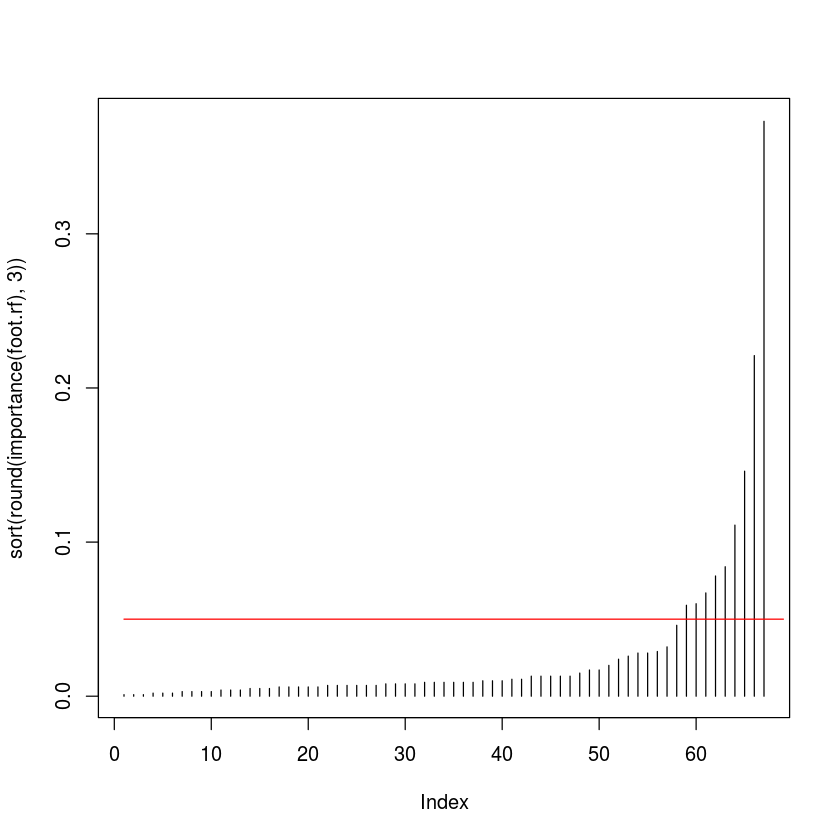

In [6]:
classement_variables = order(round(importance(foot.rf), 3))
plot(sort(round(importance(foot.rf), 3)), type = 'h')
lines(seq(1,70,2),rep(0.05,35), col = 2)

A la vue de ce graphique, on peut se fixer de ne garder que les variables pour lesquelles l'importance est supérieure à $0.05$. Il en reste alors 9.

In [7]:
df.rf = data.frame(matrix(round(importance(foot.rf)[importance(foot.rf)>0.05], 3)))
rownames(df.rf) = rownames(importance(foot.rf))[(importance(foot.rf)>0.05)]

In [8]:
df.rf

,matrix.round.importance.foot.rf..importance.foot.rf....0.05...
,<dbl>
Shots_Total,0.084
ShotsZones_PenaltyArea,0.078
ShotsAccuracy_OnTarget,0.373
Assists_Other,0.067
Assists_Total,0.146
PassesLength_Total,0.059
KeyPassesLength_Total,0.111
KeyPassesLength_Short,0.221
KeyPassesType_Other,0.060


Les variables les plus explicatives du `Rating`, d'après RandomForest, sont les variables ci-dessus.  
On remarque que `Assists_Total` et `Assists_Other` sont présentes dans cette liste. Chaque passe décisive entraîne un but donc c'est sûrement pour ça : même si on a supprimé les variables buts, on n'a pas supprimé les passes décisives qui sont directement corrélées aux buts.  
Une équipe qui fait beaucoup de passes possède beaucoup le ballon et a donc des opportunités de marquer des buts. Cela reflète aussi la construction du jeu entre les joueurs (pas ou peu de duels aériens).

#### Random Forest sur la variable Points

In [85]:
data_but = data_tot[,-c(34:46,81,82,83,84)]
data_but_tot = data_but * data_tot$Nombre
points.classe = factor(as.factor(data_tot$Points), levels=seq(1, 100))

In [87]:
points.classe

[1] 91 75 72 66 61 59 56 55 53 52 49 48 46 41 38 38 36 34 33 27 90 79 69 69 68
 [26] 66 63 59 53 44 43 43 42 41 41 41 38 38 25 17 78 76 66 58 55 55 54 53 51 44
 [51] 43 43 36 33 32 28 21 19 87 76 68 61 59 59 53 53 50 50 50 47 45 44 44 41 41
 [76] 37 33 32 98 97 72 71 70 66 57 54 52 52 50 49 45 45 40 39 36 34 26 16 57 53
[101] 51 45 42 40 38 36 36 35 34 33 33 32 29 29 29 29 26 26 25 24 23 23 23 22
100 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 100

In [88]:
points.rf = randomForest(as.factor(data_tot$Points) ~ ., data=data_but_tot)

In [89]:
print(points.rf)


Call:
 randomForest(formula = as.factor(data_tot$Points) ~ ., data = data_but_tot) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 8

        OOB estimate of  error rate: 95.16%
Confusion matrix:
   16 17 19 21 22 23 24 25 26 27 28 29 32 33 34 35 36 37 38 39 40 41 42 43 44
16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
19  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
22  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
23  0  0  0  0  0  0  0  0  0  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0
24  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
25  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0
26  0  0  0  0 

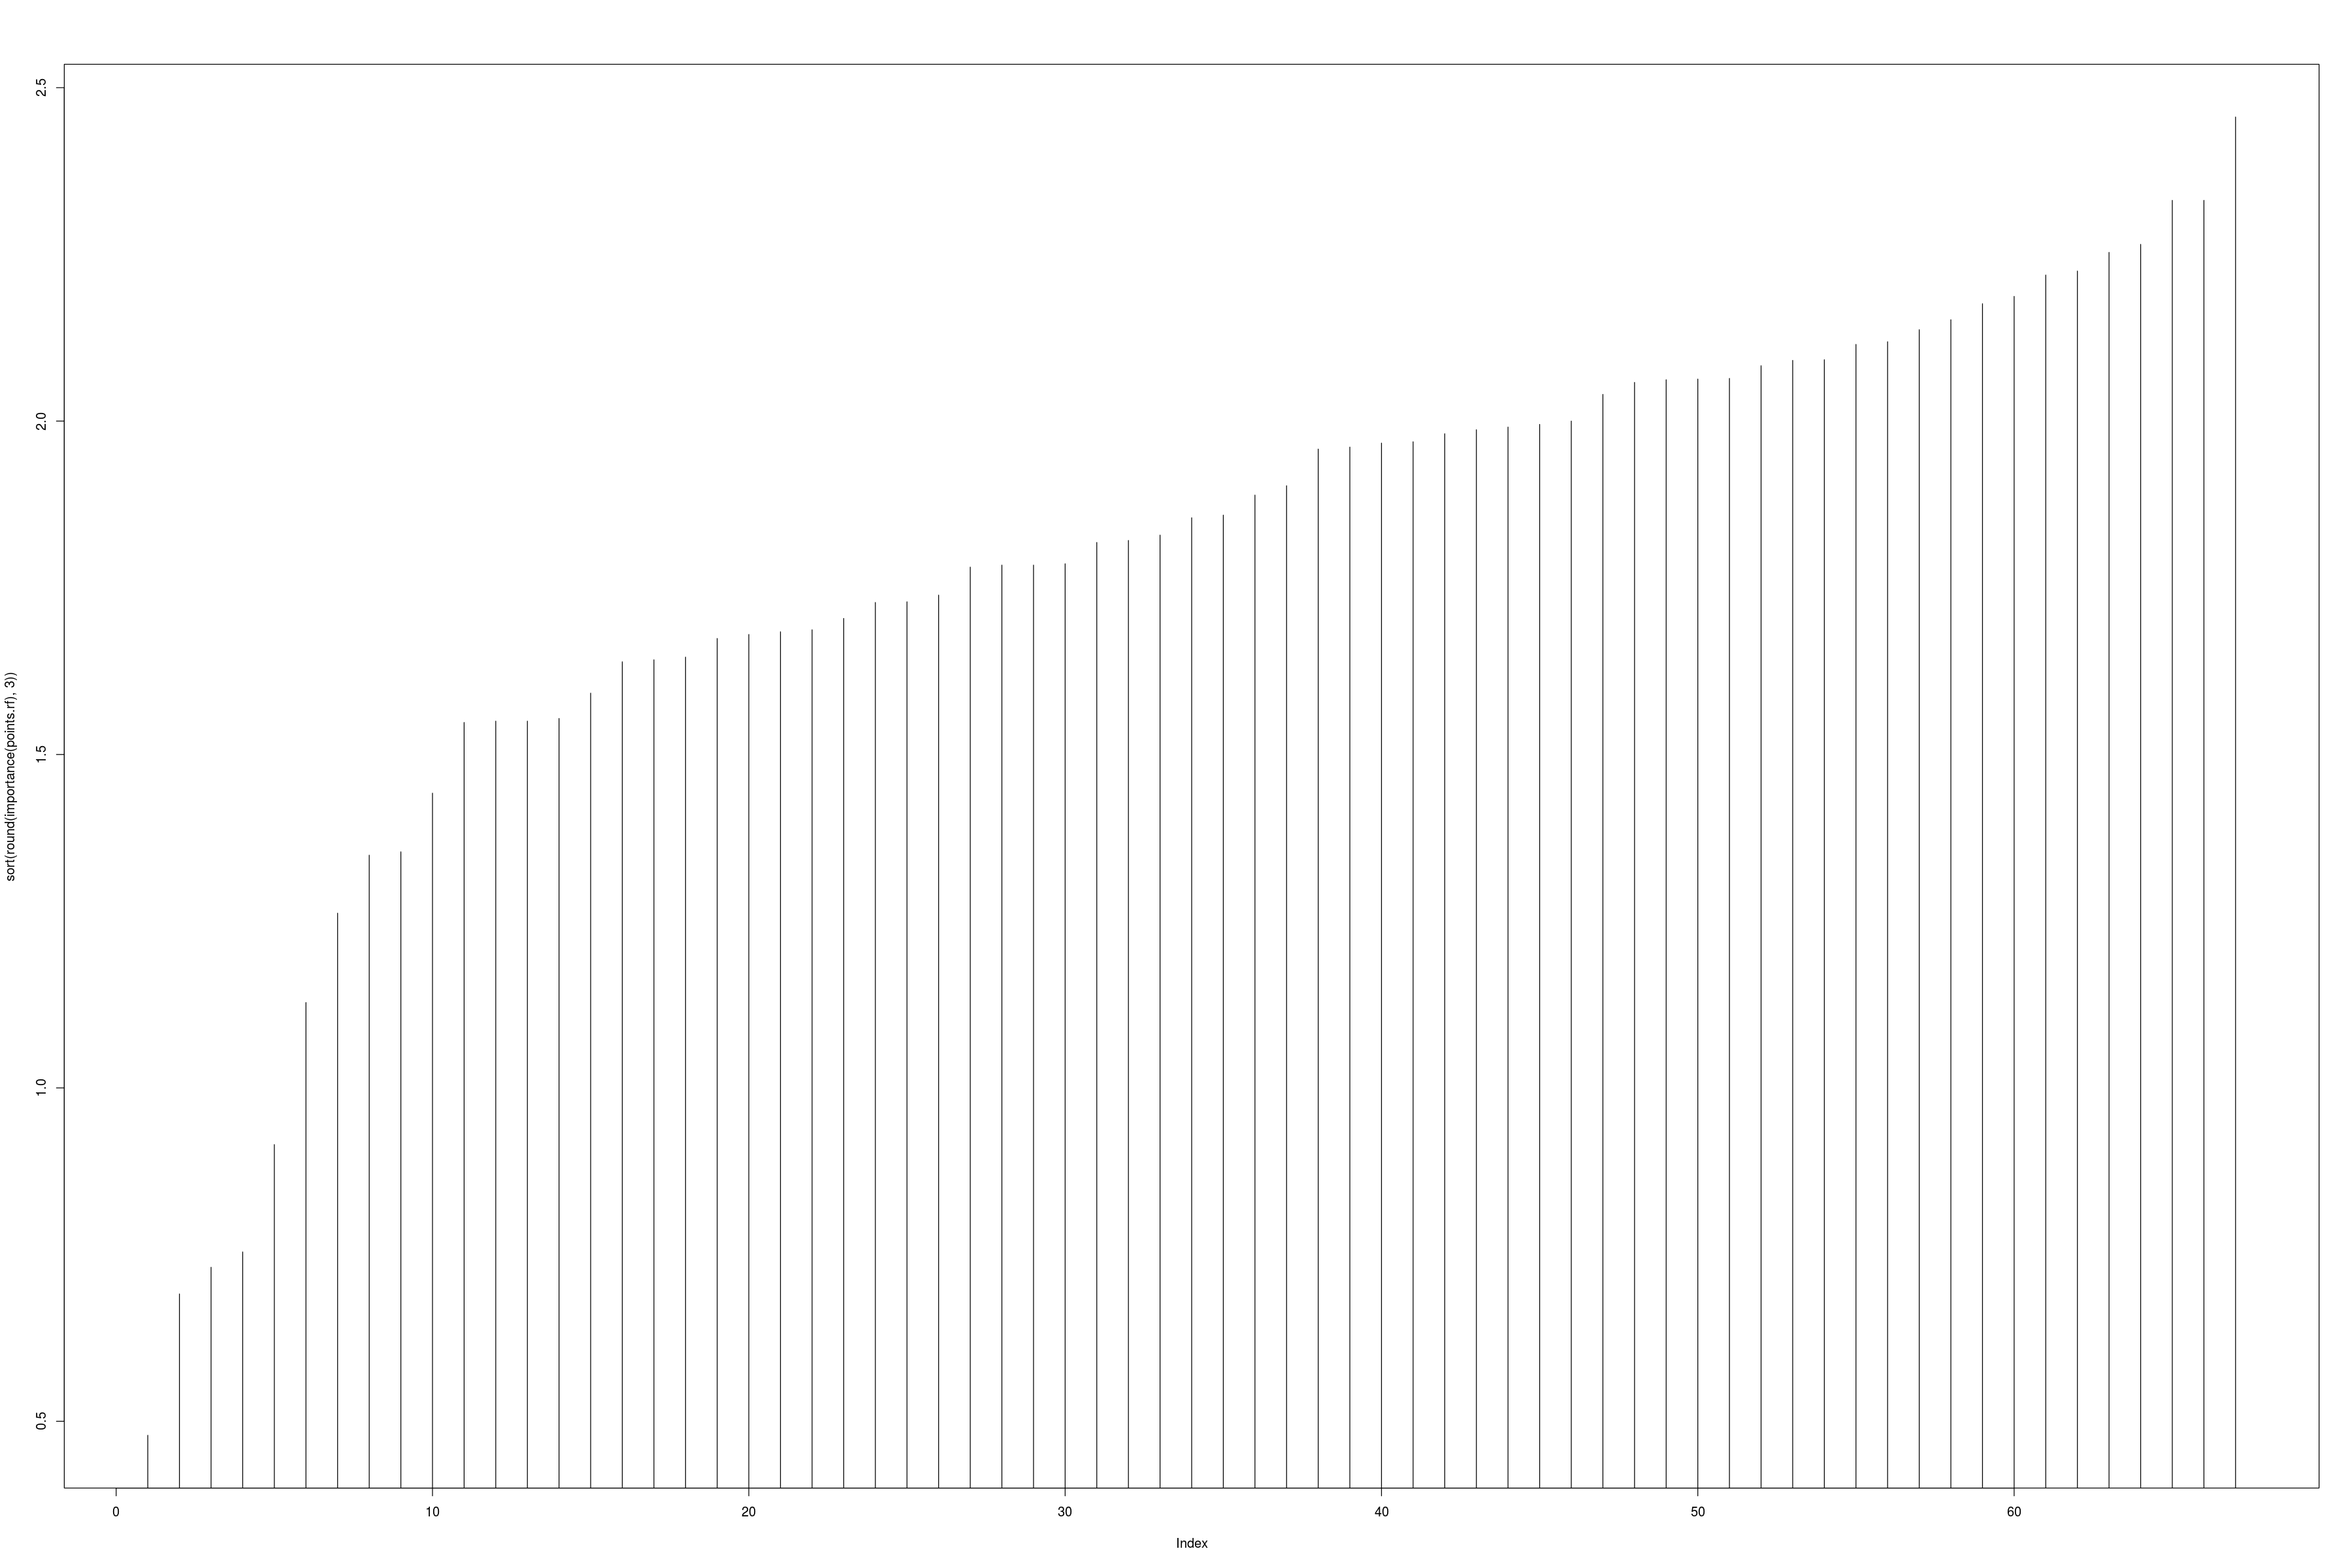

In [90]:
classement_variables_points = order(round(importance(points.rf), 3))
plot(sort(round(importance(points.rf), 3)), type = 'h')
lines(seq(1,70,2),rep(800,35), col = 2)

Ici on compte 10 variables importantes d'après RandomForest pour expliquer `Points`.

In [91]:
df.points.rf = data.frame(matrix(round(importance(points.rf)[importance(points.rf)>1.4], 3)))
rownames(df.points.rf) = rownames(importance(points.rf))[(importance(points.rf)>1.4)]

In [92]:
df.points.rf

,matrix.round.importance.points.rf..importance.points.rf....1.4...
,<dbl>
Tackles_TotalTackles,2.063
Tackles_DribbledPast,1.687
Tackles_TotalAttemptedTackles,1.646
Interception_Total,2.225
Fouls_Fouled,2.040
Fouls_Fouls,2.331
Cards_Yellow,2.092
OffSides_CaughtOffside,2.119
Clearances_Total,1.728


Ici on retrouve encore une fois des passes clés, des passes décisives, et les tirs pour expliquer la variable `Points`. On retrouve aussi les passes courtes et la longueur totale des passes, qui témoignent d'une construction du jeu.

## Extraction d'un arbre de la forêt 

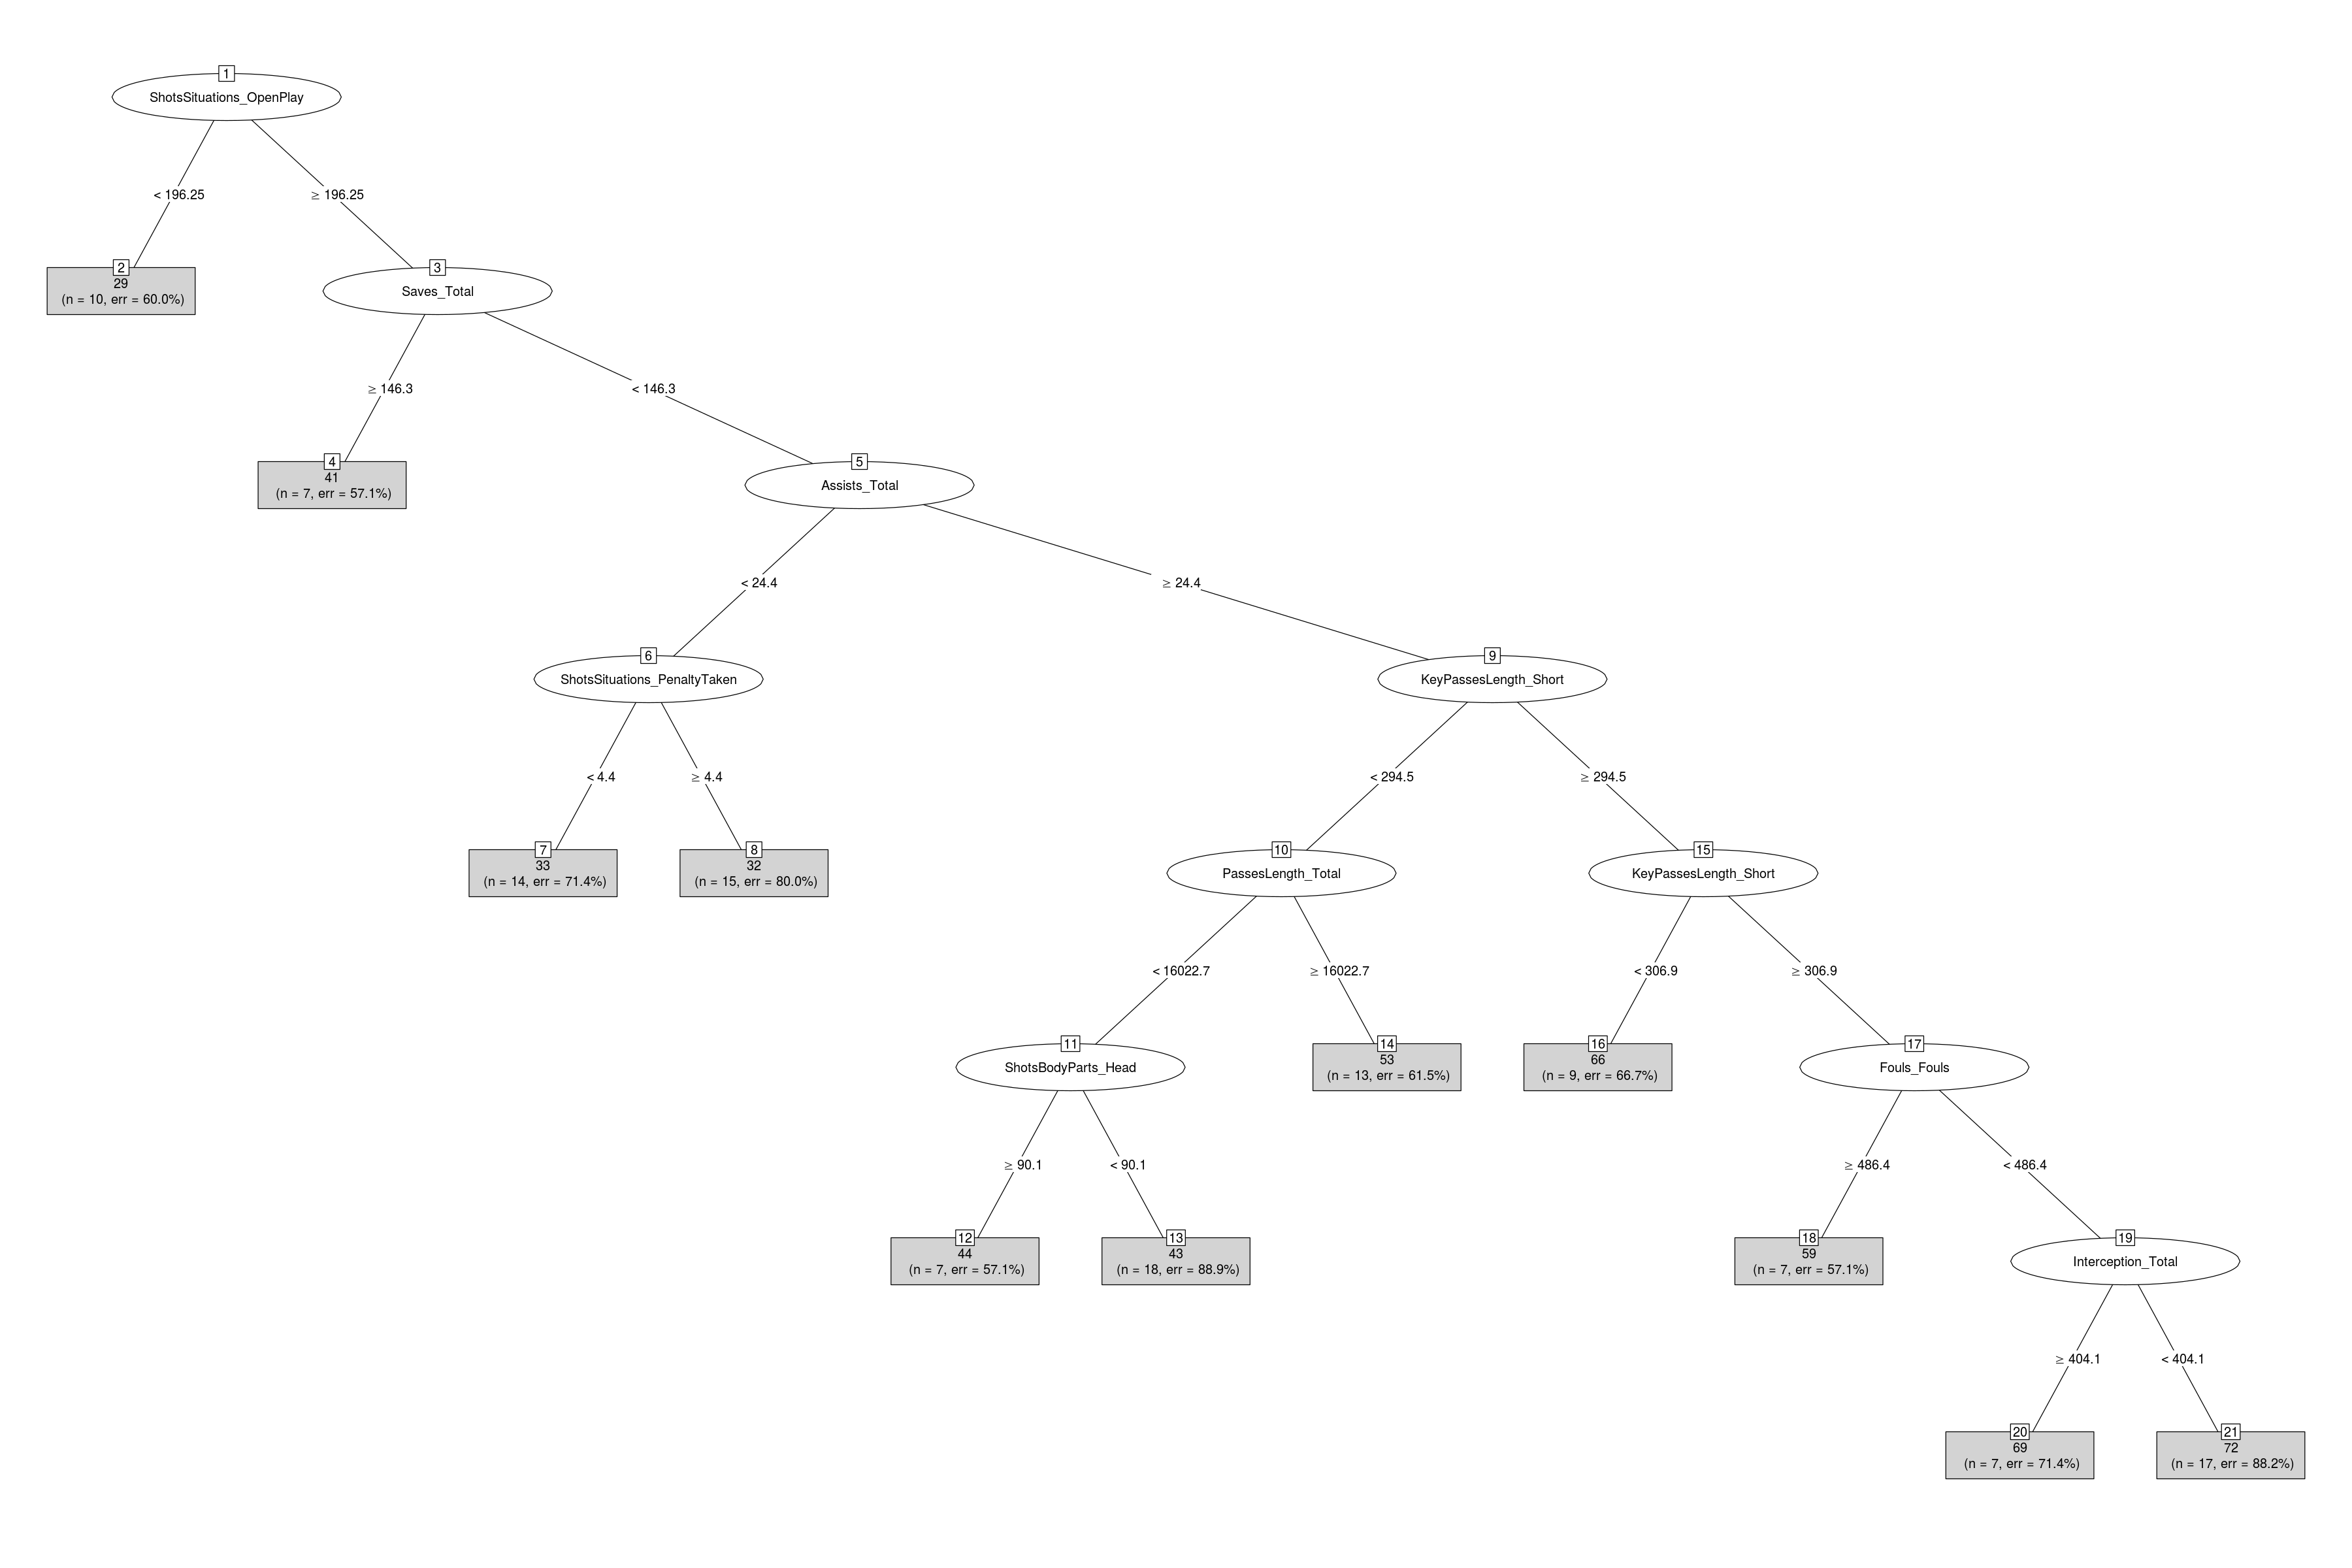

In [106]:
tree.points = rpart(points.classe ~ ., data=data_but_tot, control=rpart.control(cp=0.0001))
        # le parametre cp permet de contrôler l'élagage de l'arbre

options(repr.plot.width=30, repr.plot.height=20)
plot(as.party(tree.points), type="simple")

Ici on remarque sur un arbre que la variable `ShotsSituations_OpenPlay`, qui est la plus importante parmi les 11 retenues ci-dessus, est la première à être utilisée dans cet arbre binaire : c'est le premier noeud de l'arbre. Ensuite, c'est la variable `Saves_Total`.  
Pour le paramètre `cp`, en dessous de 0.001 on ne voit plus la différence dans l'élagage de l'arbre.

## Prediction

#### Sur la variable `Rating`

In [66]:
predict.rating = predict(foot.rf, data)

In [67]:
residus.rating = data_tot$Rating - predict.rating

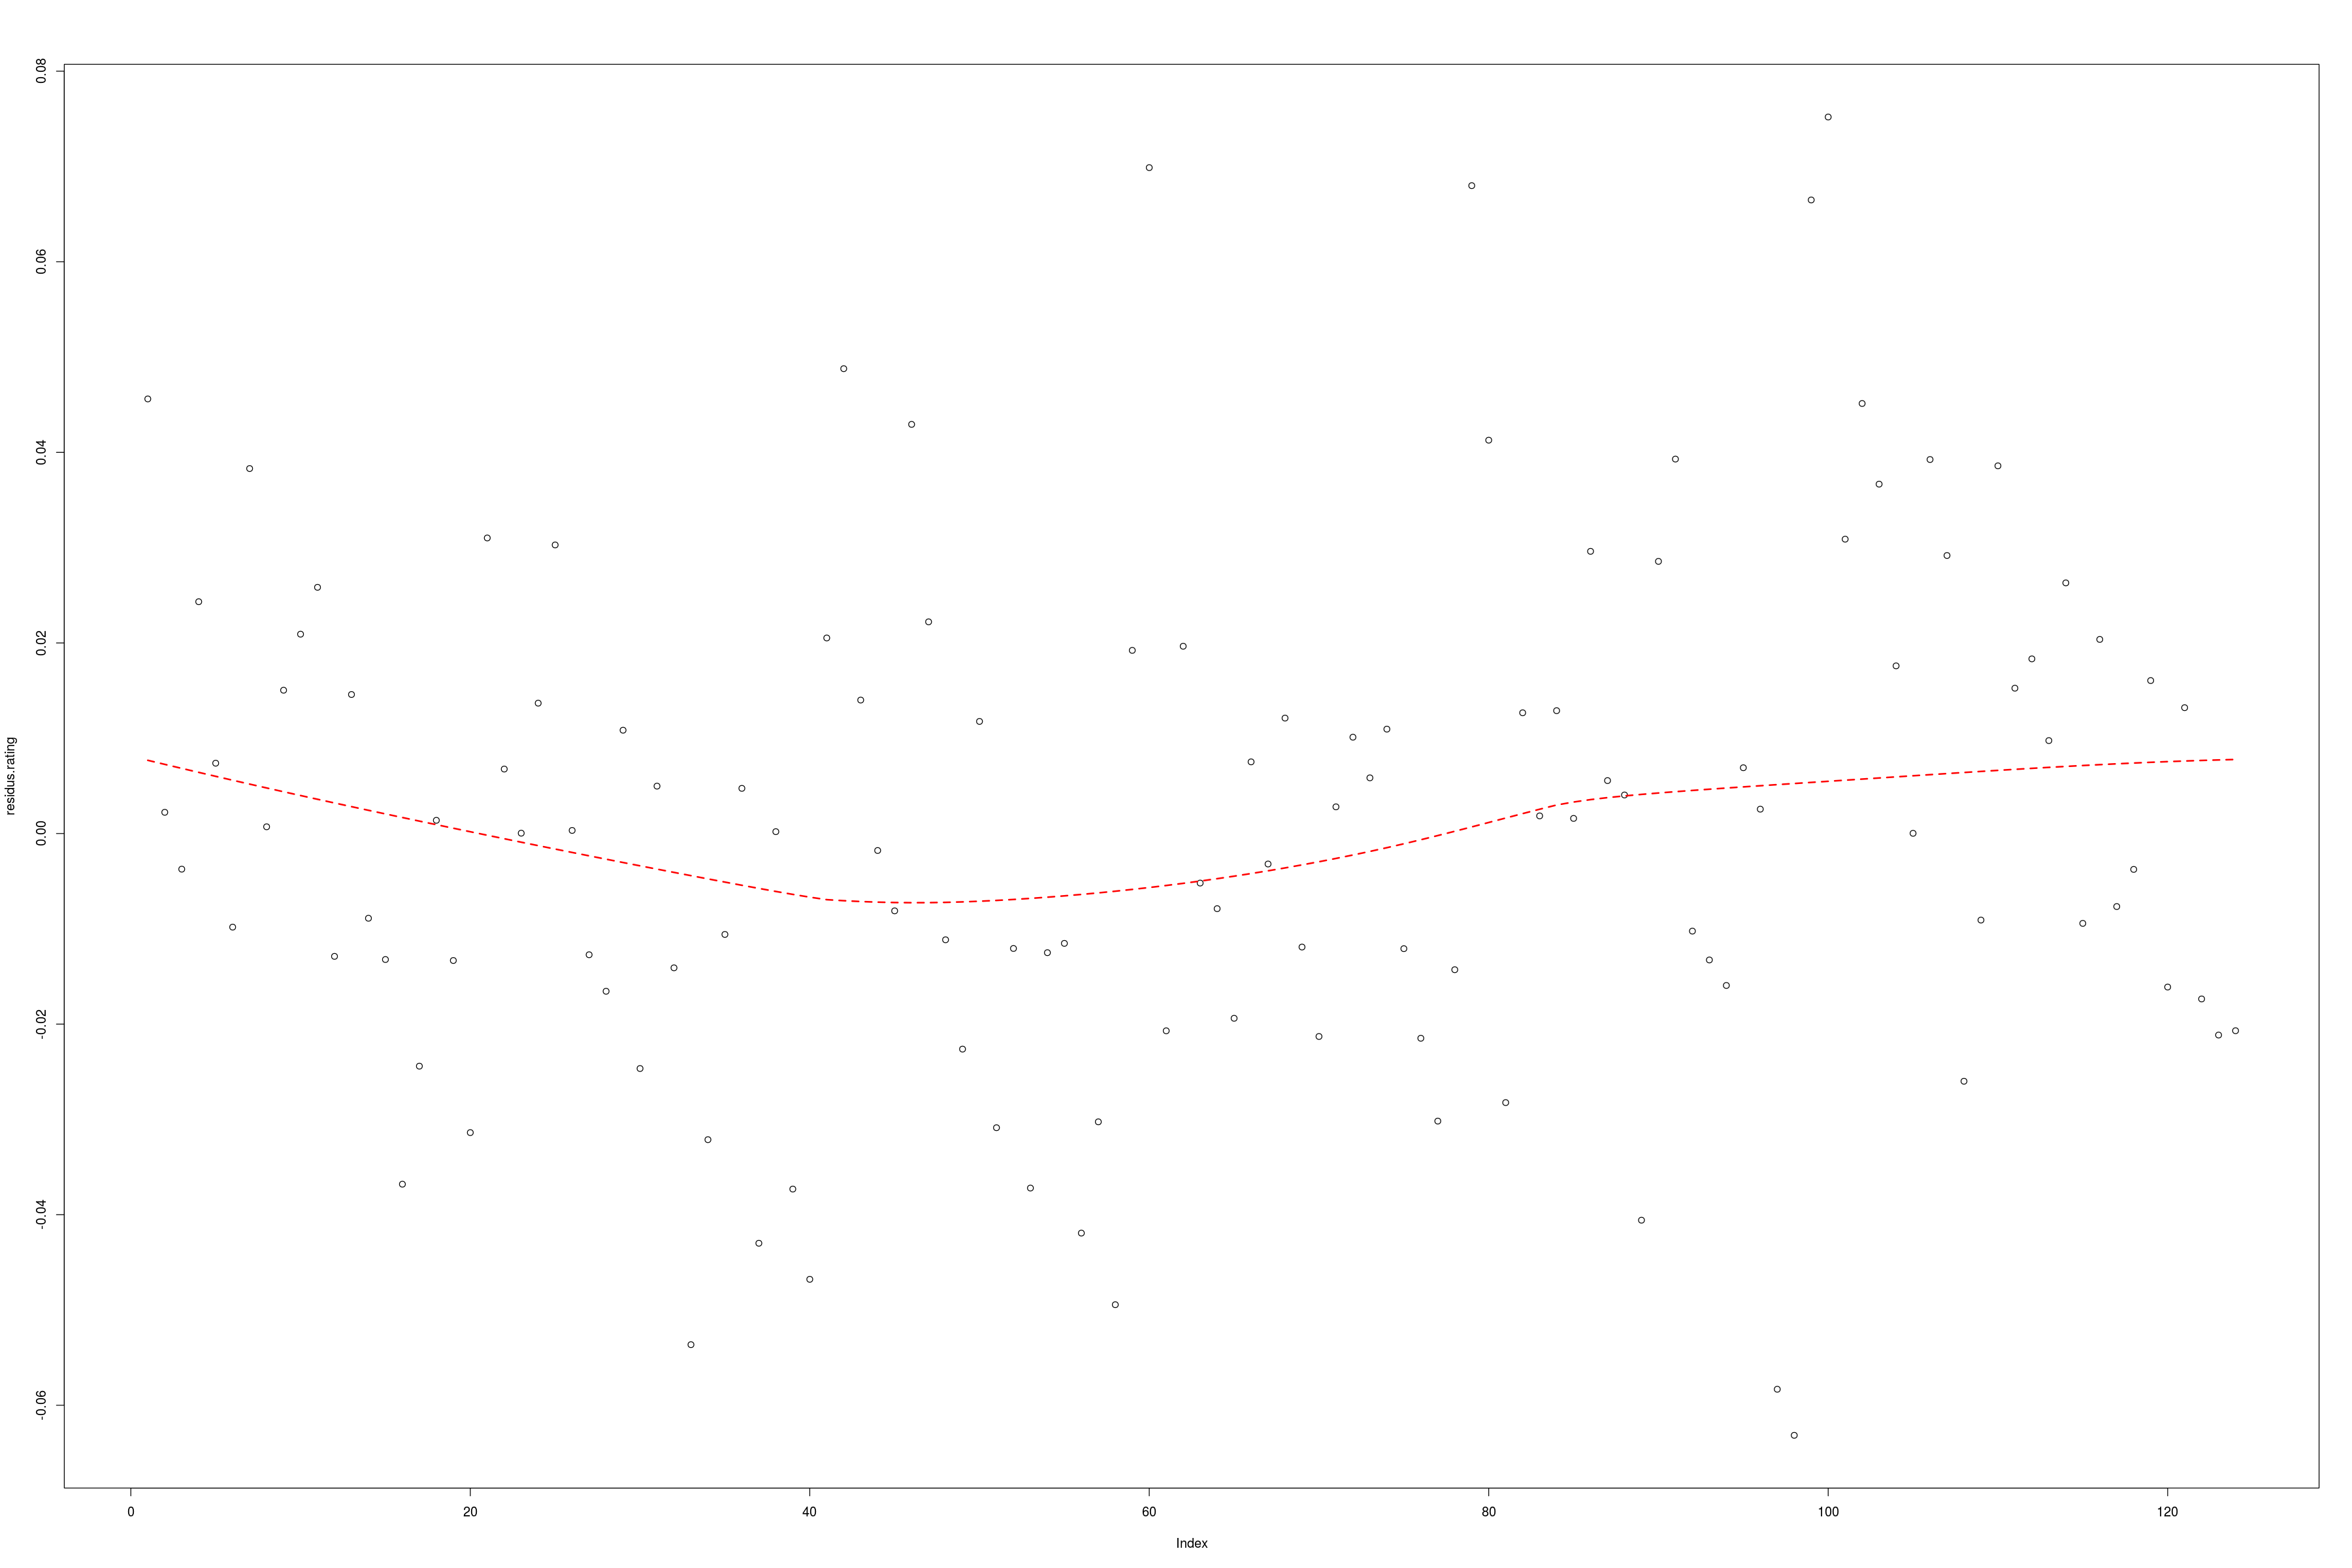

In [68]:
plot(residus.rating)
lines(lowess(seq(1,length(residus.rating)),residus.rating), col = 2, lty = 2, lwd = 2)

On voit que les résidus sont centrés, ce qui montre que la prédiction par RandomForest est efficace pour la variable `Rating`.

In [28]:
r.squared = 1-sum(residus.rating**2)/length(data_tot$Rating)*var(data_tot$Rating)

In [29]:
r.squared

[1] 0.9999891

Le $R^2$ est très proche de $1$.

#### Sur le nombre de points

In [107]:
predict.points = predict(points.rf, data_but_tot)
predict.points.integer = as.numeric(as.character(predict.points))
residus.points = data_tot$Points - predict.points.integer

In [108]:
predict.points

Paris Saint-Germain                    Lyon                   Lille 
                     91                      75                      72 
            Montpellier           Saint-Etienne               Marseille 
                     66                      61                      59 
                   Nice                   Nimes                  Rennes 
                     56                      55                      53 
             Strasbourg                   Reims                  Nantes 
                     52                      49                      48 
                 Angers                Bordeaux                Toulouse 
                     46                      41                      38 
                 Monaco                   Dijon                    Caen 
                     38                      36                      34 
                 Amiens                Guingamp                Juventus 
                     33                      27                      90 
                 Napoli                Atalanta                    Roma 
                     79                      69                      69 
                 Torino                AC Milan                   Inter 
                     68                      66                      63 
                  Lazio               Sampdoria              Fiorentina 
                     59                      53                      44 
                Udinese                 Bologna                Sassuolo 
                     43                      43                      42 
                  Genoa               SPAL 2013                Cagliari 
                     41                      41                      41 
                 Empoli       Parma Calcio 1913               Frosinone 
                     38                      38                      25 
                 Chievo           Bayern Munich  RasenBallsport Leipzig 
                     17                      78                      76 
      Borussia Dortmund        Bayer Leverkusen              Hoffenheim 
                     66                      58                      55 
    Eintracht Frankfurt               Wolfsburg     Borussia M.Gladbach 
                     55                      54                      53 
          Werder Bremen           Hertha Berlin                Mainz 05 
                     51                      44                      43 
    Fortuna Duesseldorf                Augsburg              Schalke 04 
                     43                      36                      33 
               Freiburg           VfB Stuttgart             Hannover 96 
                     32                      28                      21 
              Nuernberg               Barcelona         Atletico Madrid 
                     19                      87                      76 
            Real Madrid                Valencia                 Sevilla 
                     68                      61                      59 
             Villarreal                   Eibar           Real Sociedad 
                     59                      53                      53 
                 Getafe                Espanyol              Celta Vigo 
                     50                      50                      50 
             Real Betis         Athletic Bilbao                 Leganes 
                     47                      45                      44 
       Deportivo Alaves                  Girona                 Levante 
                     44                      41                      41 
              SD Huesca          Rayo Vallecano         Real Valladolid 
                     37                      33                      32 
        Manchester City               Liverpool                 Chelsea 
                     98                      97                      72 
              Tottenham                 Arsenal          Cryst

In [109]:
data_tot$Points

[1] 91 75 72 66 61 59 56 55 53 52 49 48 46 41 38 38 36 34 33 27 90 79 69 69 68
 [26] 66 63 59 53 44 43 43 42 41 41 41 38 38 25 17 78 76 66 58 55 55 54 53 51 44
 [51] 43 43 36 33 32 28 21 19 87 76 68 61 59 59 53 53 50 50 50 47 45 44 44 41 41
 [76] 37 33 32 98 97 72 71 70 66 57 54 52 52 50 49 45 45 40 39 36 34 26 16 57 53
[101] 51 45 42 40 38 36 36 35 34 33 33 32 29 29 29 29 26 26 25 24 23 23 23 22

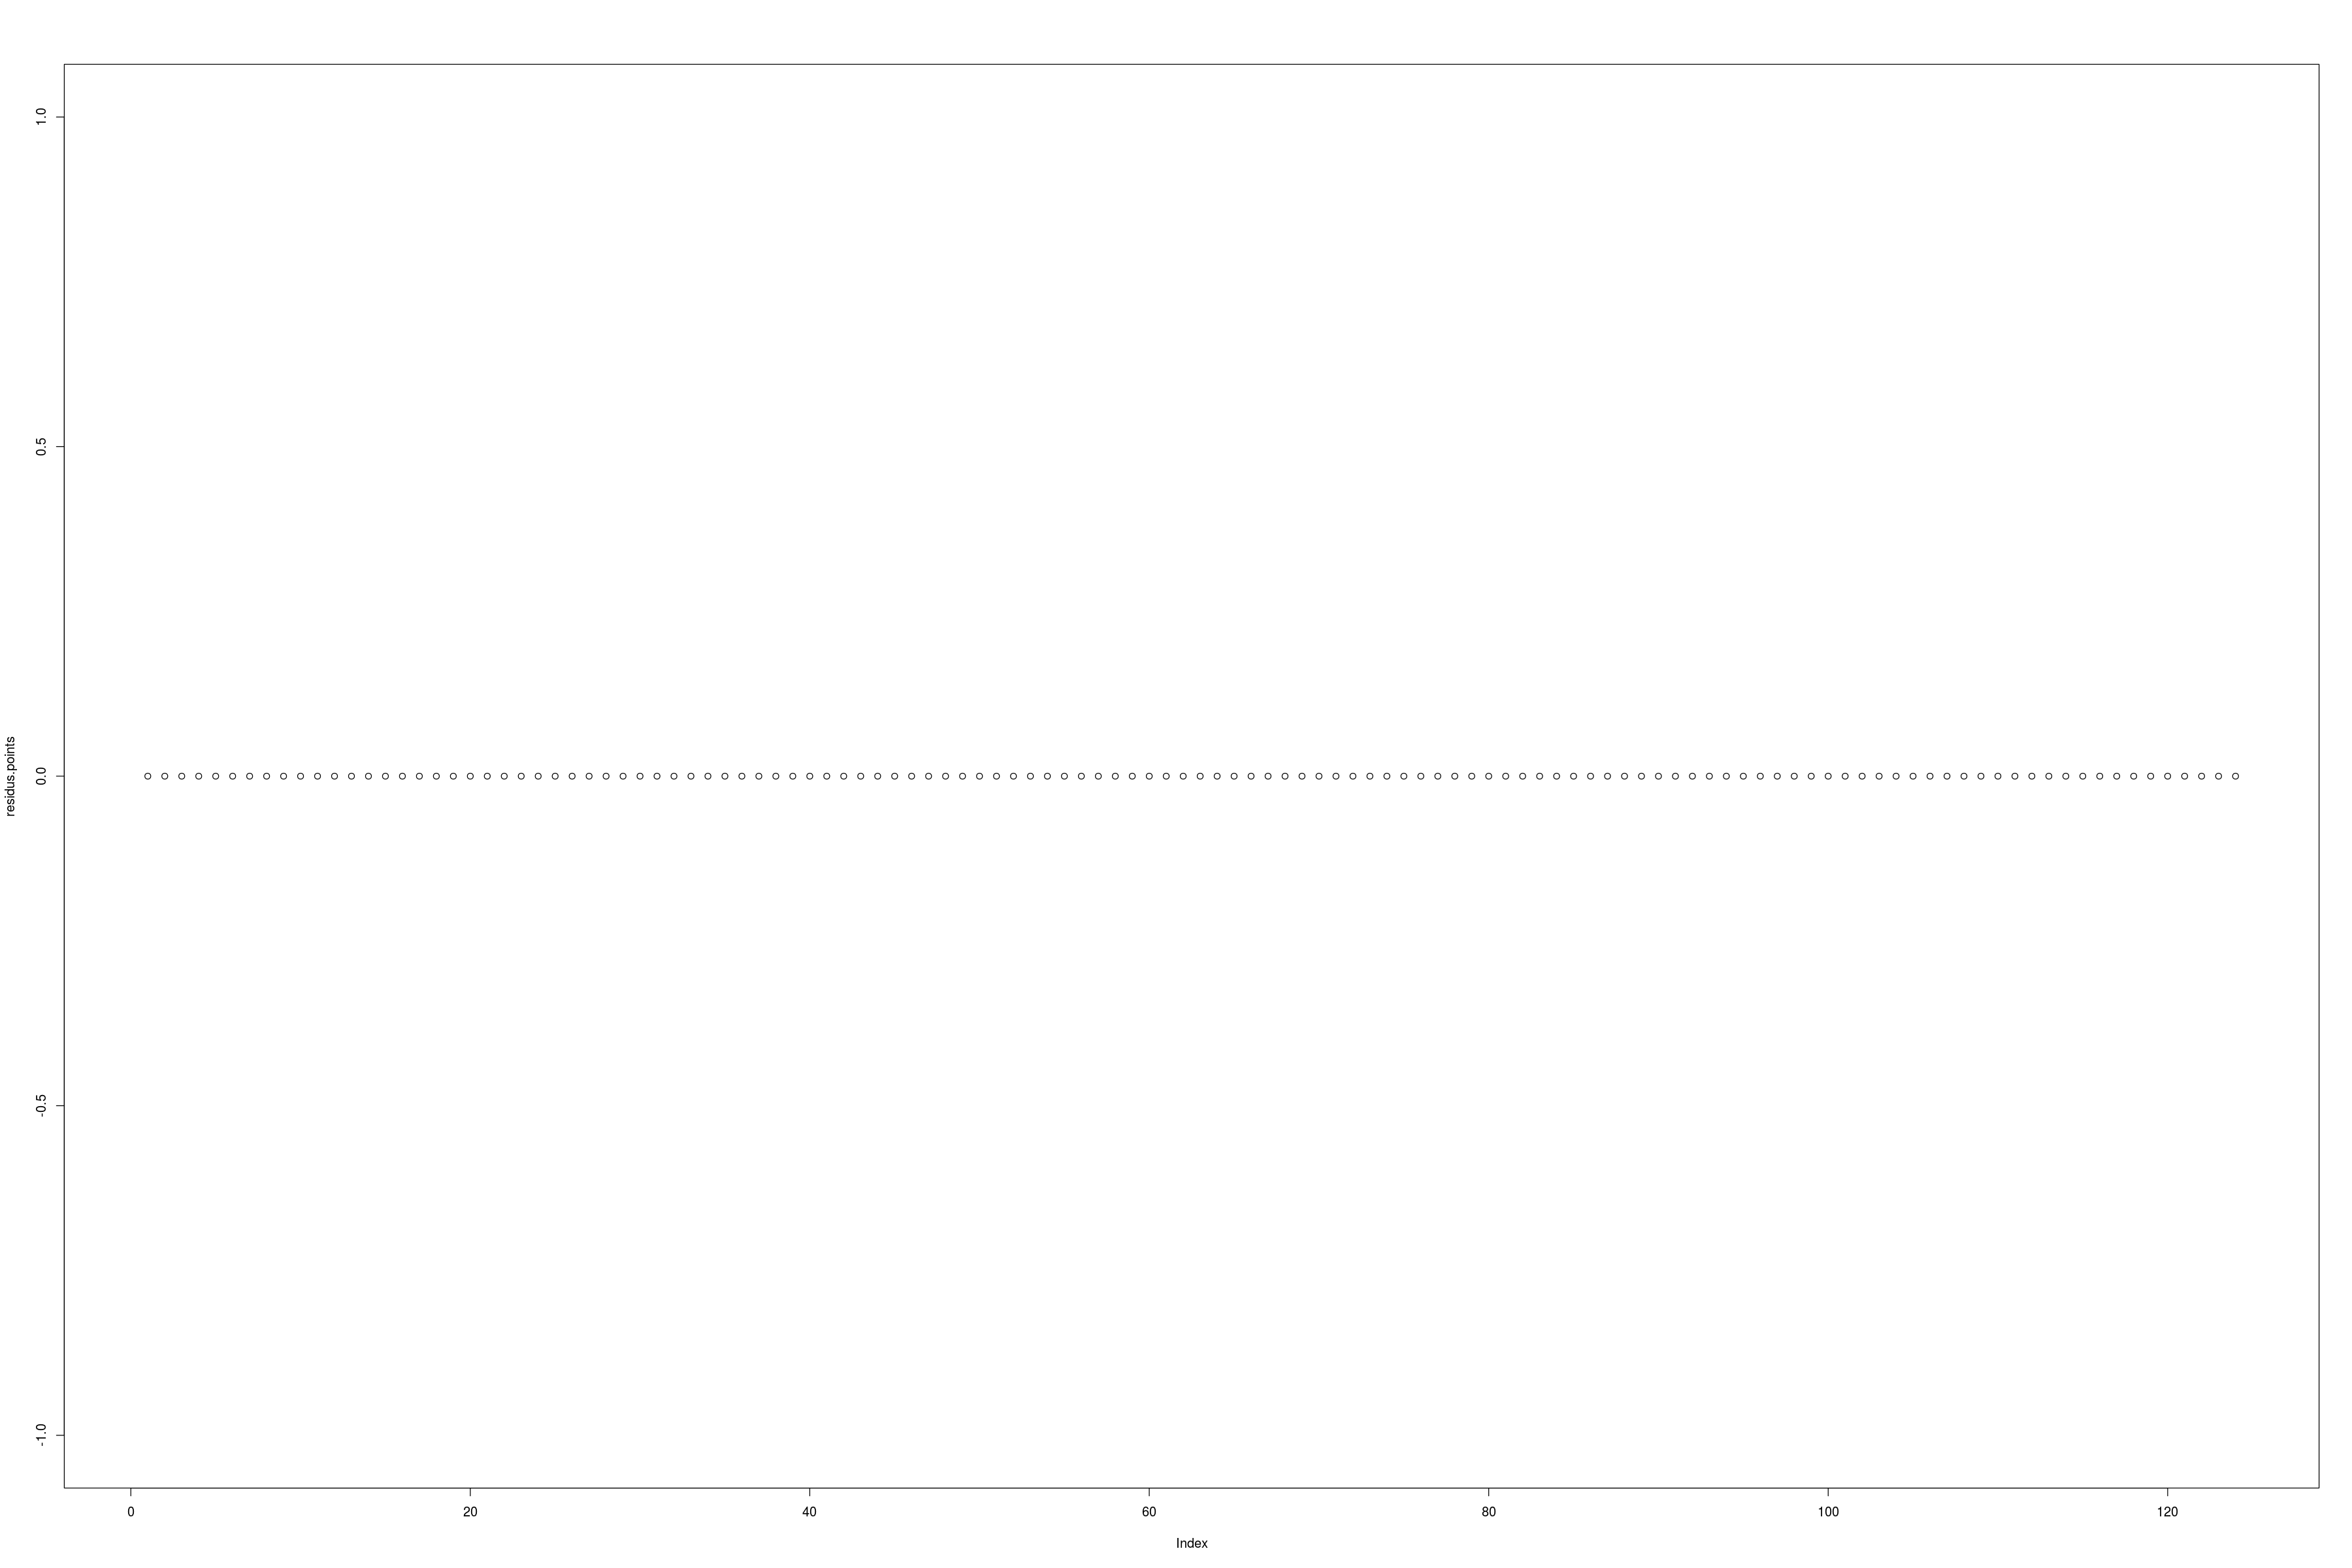

In [110]:
plot(residus.points)
#lines(lowess(seq(1,length(residus.points)),residus.points), col = 2, lty = 2, lwd = 2)

In [36]:
r.squared.points = 1-sum(residus.points**2)/length(data_tot$Points)*var(data_tot$Points)
r.squared.points

[1] -4103.287

In [41]:
sum(residus.points**2)/124*300

[1] 4053.382

In [42]:
var(data_tot$Points)

[1] 303.7676

In [43]:
mean(data_tot$Points)

[1] 47.3871

In [44]:
print(data_tot$Points)

  [1] 91 75 72 66 61 59 56 55 53 52 49 48 46 41 38 38 36 34 33 27 90 79 69 69 68
 [26] 66 63 59 53 44 43 43 42 41 41 41 38 38 25 17 78 76 66 58 55 55 54 53 51 44
 [51] 43 43 36 33 32 28 21 19 87 76 68 61 59 59 53 53 50 50 50 47 45 44 44 41 41
 [76] 37 33 32 98 97 72 71 70 66 57 54 52 52 50 49 45 45 40 39 36 34 26 16 57 53
[101] 51 45 42 40 38 36 36 35 34 33 33 32 29 29 29 29 26 26 25 24 23 23 23 22


In [46]:
1/length(data_tot$Points) * sum((data_tot$Points - mean(data_tot$Points))**2)

[1] 301.3179

In [47]:
residus.points

Paris Saint-Germain                    Lyon                   Lille 
              4.6380000               0.9079333               4.3029000 
            Montpellier           Saint-Etienne               Marseille 
              6.0255333               1.7803333              -1.2128000 
                   Nice                   Nimes                  Rennes 
              7.5835667               0.6069333               2.4429333 
             Strasbourg                   Reims                  Nantes 
              2.4858000               2.3193333              -1.6323333 
                 Angers                Bordeaux                Toulouse 
              1.2728000              -1.8193333               0.5344667 
                 Monaco                   Dijon                    Caen 
             -3.6493333              -1.0021000               3.1884667 
                 Amiens                Guingamp                Juventus 
             -0.5006000              -2.6437667               8.9027000 
                 Napoli                Atalanta                    Roma 
              1.3911000               0.5226667               1.9434333 
                 Torino                AC Milan                   Inter 
              5.1162333               1.5290000              -3.3834667 
                  Lazio               Sampdoria              Fiorentina 
             -1.2548333               0.8323333              -5.6727667 
                Udinese                 Bologna                Sassuolo 
              0.2870667              -1.6240000              -6.8010000 
                  Genoa               SPAL 2013                Cagliari 
             -3.2244667              -0.4987000               1.7558000 
                 Empoli       Parma Calcio 1913               Frosinone 
             -4.7011333               1.3916333              -5.2691000 
                 Chievo           Bayern Munich  RasenBallsport Leipzig 
             -5.4211333              -2.9624000               7.6003333 
      Borussia Dortmund        Bayer Leverkusen              Hoffenheim 
              1.0453667              -3.3202667              -7.1766000 
    Eintracht Frankfurt               Wolfsburg     Borussia M.Gladbach 
              3.7764667               2.3619667               0.5927667 
          Werder Bremen           Hertha Berlin                Mainz 05 
             -1.7664667               0.1266000              -3.1220000 
    Fortuna Duesseldorf                Augsburg              Schalke 04 
             -1.7431333              -3.7108333              -3.4959333 
               Freiburg           VfB Stuttgart             Hannover 96 
             -0.8485667              -4.7239000              -5.1202667 
              Nuernberg               Barcelona         Atletico Madrid 
             -5.2358333               2.5279333              11.2333333 
            Real Madrid                Valencia                 Sevilla 
             -2.8573667               3.1895667              -1.6306667 
             Villarreal                   Eibar           Real Sociedad 
              1.8482667               1.8497333               3.2050000 
                 Getafe                Espanyol              Celta Vigo 
              1.5572000               2.3616333              -0.8254000 
             Real Betis         Athletic Bilbao                 Leganes 
             -3.7601000              -0.1734000               0.9758000 
       Deportivo Alaves                  Girona                 Levante 
              2.7182667               1.9141333              -2.6943000 
              SD Huesca          Rayo Vallecano         Real Valladolid 
             -2.5454667              -2.6808333              -1.4591667 
        Manchester City               Liverpool                 Chelsea 
              8.6633667              10.3394667              -3.8142667 
              Tottenham                 Arsenal          Cryst

In [48]:
predict.points

Paris Saint-Germain                    Lyon                   Lille 
               86.36200                74.09207                67.69710 
            Montpellier           Saint-Etienne               Marseille 
               59.97447                59.21967                60.21280 
                   Nice                   Nimes                  Rennes 
               48.41643                54.39307                50.55707 
             Strasbourg                   Reims                  Nantes 
               49.51420                46.68067                49.63233 
                 Angers                Bordeaux                Toulouse 
               44.72720                42.81933                37.46553 
                 Monaco                   Dijon                    Caen 
               41.64933                37.00210                30.81153 
                 Amiens                Guingamp                Juventus 
               33.50060                29.64377                81.09730 
                 Napoli                Atalanta                    Roma 
               77.60890                68.47733                67.05657 
                 Torino                AC Milan                   Inter 
               62.88377                64.47100                66.38347 
                  Lazio               Sampdoria              Fiorentina 
               60.25483                52.16767                49.67277 
                Udinese                 Bologna                Sassuolo 
               42.71293                44.62400                48.80100 
                  Genoa               SPAL 2013                Cagliari 
               44.22447                41.49870                39.24420 
                 Empoli       Parma Calcio 1913               Frosinone 
               42.70113                36.60837                30.26910 
                 Chievo           Bayern Munich  RasenBallsport Leipzig 
               22.42113                80.96240                68.39967 
      Borussia Dortmund        Bayer Leverkusen              Hoffenheim 
               64.95463                61.32027                62.17660 
    Eintracht Frankfurt               Wolfsburg     Borussia M.Gladbach 
               51.22353                51.63803                52.40723 
          Werder Bremen           Hertha Berlin                Mainz 05 
               52.76647                43.87340                46.12200 
    Fortuna Duesseldorf                Augsburg              Schalke 04 
               44.74313                39.71083                36.49593 
               Freiburg           VfB Stuttgart             Hannover 96 
               32.84857                32.72390                26.12027 
              Nuernberg               Barcelona         Atletico Madrid 
               24.23583                84.47207                64.76667 
            Real Madrid                Valencia                 Sevilla 
               70.85737                57.81043                60.63067 
             Villarreal                   Eibar           Real Sociedad 
               57.15173                51.15027                49.79500 
                 Getafe                Espanyol              Celta Vigo 
               48.44280                47.63837                50.82540 
             Real Betis         Athletic Bilbao                 Leganes 
               50.76010                45.17340                43.02420 
       Deportivo Alaves                  Girona                 Levante 
               41.28173                39.08587                43.69430 
              SD Huesca          Rayo Vallecano         Real Valladolid 
               39.54547                35.68083                33.45917 
        Manchester City               Liverpool                 Chelsea 
               89.33663                86.66053                75.81427 
              Tottenham                 Arsenal          Cryst

In [55]:
mobforest.analysis(as.formula(data_tot$Points ~ .), data=data_but_tot, colnames(data_but_tot))

ERROR: Error in terms.formula(formula): '.' dans la formule et pas d'argument 'data'


In [59]:
points.classe = as.factor(seq(1,100))

In [60]:
points.classe

[1] 1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18 
 [19] 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36 
 [37] 37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54 
 [55] 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72 
 [73] 73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90 
 [91] 91  92  93  94  95  96  97  98  99  100
100 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 100

## SVM

In [112]:
svm.rating = svm(data_tot$Rating ~ ., data=data)

In [113]:
svm.rating


Call:
svm(formula = data_tot$Rating ~ ., data = data)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.01492537 
    epsilon:  0.1 


Number of Support Vectors:  101


In [115]:
plot(svm.rating, data)